#**Exploring CAPM: Return and Risk in Securities**

## Introduction to CAPM

The Capital Asset Pricing Model (CAPM) is a foundational concept in finance that establishes a relationship between the expected return of an asset and its risk. It serves as a critical tool for investors and analysts to assess the profitability of investments while considering their inherent risks.

### Key Components of CAPM

1. **Expected Return**: The return that investors anticipate from an investment, which is influenced by market conditions and the asset's risk profile.

2. **Risk-Free Rate**: The return on an investment with zero risk, typically represented by government bonds (e.g., U.S. Treasury bonds). This rate serves as the baseline for measuring risk.

3. **Market Return**: The expected return of the overall market, often represented by a market index such as the S&P 500.

4. **Beta (β)**: A measure of an asset's volatility or systematic risk in relation to the overall market. A beta greater than 1 indicates higher risk, while a beta less than 1 signifies lower risk.


### The CAPM Formula

The CAPM formula can be expressed as follows:

$$
E(R_{i}) = R_{f} + \beta_{i} \times (E(R_{m}) - R_{f})
$$

Where:
- $E(R_{i})$ : Expected return of the asset
- $R_{f}$ : Risk-free rate
- $\beta_{i}$ : Beta of the asset
- $E(R_{m})$ : Expected return of the market


### Importance of CAPM

CAPM provides investors with a systematic approach to evaluate the potential returns on investments based on their risk levels. By understanding the trade-off between risk and return, investors can make informed decisions and optimize their investment portfolios.



**Importing Libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

## Reading the Data

In [ ]:
import pandas as pd
import zipfile
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Unzip the file
zip_file_path = '/content/archive.zip'  # Path to your zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('stock_data')

# List all CSV files in the extracted directory
stock_files = [file for file in os.listdir('stock_data') if file.endswith('.csv')]

# Initialize a list to store DataFrames
stock_dataframes = []

# Loop through each CSV file to read and process the data
for stock_file in stock_files:
    # Read each CSV file
    stock_data = pd.read_csv(os.path.join('stock_data', stock_file))

    # Convert 'Date' column to datetime
    stock_data['Date'] = pd.to_datetime(stock_data['Date'])

    # Retain only the Date and the adjusted close price
    stock_data = stock_data[['Date', 'Adj Close']]  # Assuming you want 'Adj Close'
    stock_data.columns = ['Date', f"{stock_file.split('.')[0]}_prices"]  # Rename columns

    # Append the DataFrame to the list
    stock_dataframes.append(stock_data)

# Merge all DataFrames on 'Date' using inner join to keep only common dates
combined_data = stock_dataframes[0]
for df in stock_dataframes[1:]:
    combined_data = pd.merge(combined_data, df, on='Date', how='inner')

# Print the head of the final combined DataFrame
print(combined_data.head())

# Save the combined DataFrame as stocks.csv in Google Drive
output_file_path = '/content/drive/My Drive/stocks.csv'  # Specify the path where you want to save the file
combined_data.to_csv(output_file_path, index=False)
print(f'Saved the combined data to {output_file_path}')


Mounted at /content/drive
        Date  AMZN_prices_prices  TSLA_prices_prices  META_prices_prices  \
0 2012-05-18             10.6925            1.837333           38.230000   
1 2012-05-21             10.9055            1.918000           34.029999   
2 2012-05-22             10.7665            2.053333           31.000000   
3 2012-05-23             10.8640            2.068000           32.000000   
4 2012-05-24             10.7620            2.018667           33.029999   

   AAPL_prices_prices  JNJ_prices_prices  V_prices_prices  PG_prices_prices  \
0           16.056870          45.560417        25.950735         45.148891   
1           16.992340          45.646709        26.775518         45.056484   
2           16.861866          45.682663        27.275454         44.885895   
3           17.273298          45.502876        27.455160         44.345703   
4           17.114651          45.822403        27.593388         44.473652   

   JPM_prices_prices  MSFT_prices_prices  

##Fetching S&P 500 Data

In [2]:
import pandas as pd
import yfinance as yf

# Load your existing CSV file
df = pd.read_csv('/content/stocks.csv')

# Convert the 'Date' column to datetime format for merging
df['Date'] = pd.to_datetime(df['Date'])

# Fetch S&P 500 data
sp500 = yf.download('^GSPC', start=df['Date'].min(), end=df['Date'].max())
sp500.reset_index(inplace=True)
sp500.rename(columns={'Date': 'Date', 'Adj Close': 'S&P500'}, inplace=True)

# Merge the S&P 500 data with your DataFrame
merged_df = pd.merge(df, sp500[['Date', 'S&P500']], on='Date', how='left')

# Display the merged DataFrame
print(merged_df)


[*********************100%***********************]  1 of 1 completed

           Date  AMZN_prices_prices  TSLA_prices_prices  META_prices_prices  \
0    2012-05-18           10.692500            1.837333           38.230000   
1    2012-05-21           10.905500            1.918000           34.029999   
2    2012-05-22           10.766500            2.053333           31.000000   
3    2012-05-23           10.864000            2.068000           32.000000   
4    2012-05-24           10.762000            2.018667           33.029999   
...         ...                 ...                 ...                 ...   
2938 2024-01-24          156.869995          207.830002          390.700012   
2939 2024-01-25          157.750000          182.630005          393.179993   
2940 2024-01-26          159.119995          183.250000          394.140015   
2941 2024-01-29          161.259995          190.929993          401.019989   
2942 2024-01-30          159.000000          191.589996          400.059998   

      AAPL_prices_prices  JNJ_prices_prices  V_pric

In [3]:
# Clean up column names
merged_df.columns = merged_df.columns.str.replace('_prices_prices', '', regex=False)

# Check for NaN values in the DataFrame
nan_values = merged_df.isnull().sum()

# Display the cleaned DataFrame and NaN values
print(merged_df.head())
print("\nNaN Values in Each Column:\n", nan_values)


        Date     AMZN      TSLA       META       AAPL        JNJ          V  \
0 2012-05-18  10.6925  1.837333  38.230000  16.056870  45.560417  25.950735   
1 2012-05-21  10.9055  1.918000  34.029999  16.992340  45.646709  26.775518   
2 2012-05-22  10.7665  2.053333  31.000000  16.861866  45.682663  27.275454   
3 2012-05-23  10.8640  2.068000  32.000000  17.273298  45.502876  27.455160   
4 2012-05-24  10.7620  2.018667  33.029999  17.114651  45.822403  27.593388   

          PG        JPM       MSFT      GOOGL       S&P500  
0  45.148891  24.109100  23.571970  15.025025  1295.219971  
1  45.056484  23.403612  23.958529  15.368118  1315.989990  
2  44.885895  24.483442  23.966579  15.035035  1316.630005  
3  44.345703  24.663406  23.443117  15.251752  1318.859985  
4  44.473652  24.454641  23.410898  15.106607  1320.680054  

NaN Values in Each Column:
 Date      0
AMZN      0
TSLA      0
META      0
AAPL      0
JNJ       0
V         0
PG        0
JPM       0
MSFT      0
GOOGL     

In [4]:
stocks_df = merged_df.fillna(method='ffill')


<ipython-input-4-8ec5725cf9f9>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stocks_df = merged_df.fillna(method='ffill')


In [5]:
# Function to normalize the prices based on the initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

##Calculating Daily Returns

In [6]:
# Function to calculate the daily returns
def daily_return(df):

  df_daily_return = df.copy()

  # Loop through each stock
  for i in df.columns[1:]:

    # Loop through each row belonging to the stock
    for j in range(1, len(df)):

      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100

    # Set the value of first row to zero, as previous value is not available
    df_daily_return[i][0] = 0
  return df_daily_return

In [7]:
# Get the daily returns
stocks_daily_return = daily_return(stocks_df)
stocks_daily_return

Streaming output truncated to the last 5000 lines.
<ipython-input-6-e4ca5b7db44a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
<ipython-input-6-e4ca5b7db44a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
<ipython-input-6-e4ca5b7db44a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_daily_retu

Date      AMZN       TSLA       META      AAPL       JNJ         V  \
0    2012-05-18  0.000000   0.000000   0.000000  0.000000  0.000000  0.000000   
1    2012-05-21  1.992053   4.390441 -10.986139  5.825984  0.189402  3.178266   
2    2012-05-22 -1.274586   7.055947  -8.903905 -0.767841  0.078765  1.867135   
3    2012-05-23  0.905585   0.714304   3.225806  2.440016 -0.393556  0.658858   
4    2012-05-24 -0.938883  -2.385546   3.218746 -0.918455  0.702212  0.503466   
...         ...       ...        ...        ...       ...       ...       ...   
2938 2024-01-24  0.544796  -0.626374   1.427830 -0.348393 -0.531876  0.143768   
2939 2024-01-25  0.560977 -12.125293   0.634753 -0.169667  0.377448  0.353393   
2940 2024-01-26  0.868460   0.339482   0.244169 -0.901272 -0.037602 -1.713064   
2941 2024-01-29  1.344897   4.190992   1.745566 -0.358592 -0.087774  2.134807   
2942 2024-01-30 -1.401460   0.345678  -0.239387 -1.924583 -0.370229  1.275302   

            PG       JPM      MSFT     GOOGL    S&P500  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1    -0.204672 -2.926232  1.639908  2.283476  1.603590  
2    -0.378612  4.613947  0.033604 -2.167365  0.048634  
3    -1.203478  0.735044 -2.184134  1.441412  0.169370  
4     0.288526 -0.846457 -0.137435 -0.951658  0.138003  
...        ...       ...       ...       ...       ...  
2938 -1.207950  0.893541  0.917524  1.128947  0.081193  
2939  2.300815  1.431086  0.573827  2.131808  0.526037  
2940  0.334150 -0.381637 -0.232174  0.210711 -0.065179  
2941  0.012812  0.261201  1.433419  0.867332  0.755677  
2942  0.851692  2.049446 -0.275799 -1.335410  0.000000  

[2943 rows x 12 columns]

## Calculating BETA for a Single Stock

In [8]:
# Select any stock, let's say Apple
stocks_daily_return['AAPL']

0       0.000000
1       5.825984
2      -0.767841
3       2.440016
4      -0.918455
          ...   
2938   -0.348393
2939   -0.169667
2940   -0.901272
2941   -0.358592
2942   -1.924583
Name: AAPL, Length: 2943, dtype: float64

In [9]:
# Select the S&P500 (Market)
stocks_daily_return['S&P500']

0       0.000000
1       1.603590
2       0.048634
3       0.169370
4       0.138003
          ...   
2938    0.081193
2939    0.526037
2940   -0.065179
2941    0.755677
2942    0.000000
Name: S&P500, Length: 2943, dtype: float64

In [10]:
import plotly.express as px

# Plotting a scatter plot between AAPL and S&P500 (Market) using Plotly with green markers
fig = px.scatter(stocks_daily_return,
                 x='S&P500',
                 y='AAPL',
                 title='Scatter plot between AAPL and S&P500',
                 labels={'S&P500': 'S&P 500 Daily Returns', 'AAPL': 'AAPL Daily Returns'})

# Customize marker color to green
fig.update_traces(marker=dict(color='green'))

# Show the plot
fig.show()


In [11]:
import plotly.graph_objects as go
import numpy as np

# Scatter plot between AAPL and S&P500 (Market) with green markers
fig = go.Figure()

# Add scatter plot (AAPL vs S&P500)
fig.add_trace(go.Scatter(x=stocks_daily_return['S&P500'],
                         y=stocks_daily_return['AAPL'],
                         mode='markers',
                         marker=dict(color='green', size=5),
                         name='AAPL vs S&P500'))

# Fit a linear polynomial (straight line) between AAPL and S&P500
beta, alpha = np.polyfit(stocks_daily_return['S&P500'], stocks_daily_return['AAPL'], 1)

# Add the regression line (straight line with beta and alpha parameters)
fig.add_trace(go.Scatter(x=stocks_daily_return['S&P500'],
                         y=beta * stocks_daily_return['S&P500'] + alpha,
                         mode='lines',
                         line=dict(color='red', width=2),
                         name='Fitted Line'))

# Set plot title and axis labels
fig.update_layout(
    title="Scatter plot and Regression Line for AAPL",
    xaxis_title="S&P 500 Daily Returns",
    yaxis_title="AAPL Daily Returns",
    showlegend=True
)

# Show the plot
fig.show()

# Print the Beta and Alpha values
print(f'Beta for AAPL stock is = {beta} and alpha is = {alpha}')


Beta for AAPL stock is = 1.1713397089344952 and alpha is = 0.03968494745034152


##Applying the CAPM formula to an individual Stock

In [12]:
beta

1.1713397089344952

In [13]:
# Calculating the average daily rate of return for S&P500
stocks_daily_return['S&P500'].mean()

0.051183096082351685

In [14]:
# Calculating the annualized rate of return for S&P500
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday)
rm = stocks_daily_return['S&P500'].mean() * 252
rm

12.898140212752624

In [15]:
# Assuming risk free rate is zero
rf = 0

# Calculating return for any security (APPL) using CAPM
ER_AAPL = rf + ( beta * (rm-rf) )
ER_AAPL

15.108103802601967

##Calculating BETA for All Stocks

In [16]:
import plotly.graph_objects as go
import numpy as np

# Creating a placeholder for all betas and alphas (empty dictionaries)
beta = {}
alpha = {}

# Loop on every stock's daily return
for i in stocks_daily_return.columns:

    # Ignoring the Date and S&P500 columns
    if i != 'Date' and i != 'S&P500':

        # Scatter plot between each individual stock and the S&P500 (Market)
        fig = go.Figure()

        # Add scatter plot (Stock vs S&P500) with green markers
        fig.add_trace(go.Scatter(x=stocks_daily_return['S&P500'],
                                 y=stocks_daily_return[i],
                                 mode='markers',
                                 marker=dict(color='green', size=5),
                                 name=f'{i} vs S&P500'))

        # Fit a linear polynomial between each stock and the S&P500
        b, a = np.polyfit(stocks_daily_return['S&P500'], stocks_daily_return[i], 1)

        # Add regression line (fitted line)
        fig.add_trace(go.Scatter(x=stocks_daily_return['S&P500'],
                                 y=b * stocks_daily_return['S&P500'] + a,
                                 mode='lines',
                                 line=dict(color='red', width=2),
                                 name='Fitted Line'))

        # Set plot title and axis labels
        fig.update_layout(
            title=f"Scatter plot and Regression Line for {i}",
            xaxis_title="S&P 500 Daily Returns",
            yaxis_title=f"{i} Daily Returns",
            showlegend=True
        )

        # Show the plot
        fig.show()

        # Store beta and alpha values
        beta[i] = b
        alpha[i] = a


In [17]:
# Viewing Beta for every stock
beta

{'AMZN': 1.1486703039913129,
 'TSLA': 1.448424181865304,
 'META': 1.230571015166253,
 'AAPL': 1.1713397089344952,
 'JNJ': 0.5875156391852394,
 'V': 1.0796715419466607,
 'PG': 0.5828775079580637,
 'JPM': 1.1320513934309895,
 'MSFT': 1.1931999416144046,
 'GOOGL': 1.1336685045425023}

In [18]:
# Viewing alpha for each of the stocks
# Alpha describes the strategy's ability to beat the market (S&P500)
# Alpha indicates the “excess return” or “abnormal rate of return”
# A positive 0.175 alpha for Tesla means that the portfolio’s return exceeded the benchmark S&P500 index by 17%.

alpha

{'AMZN': 0.05356844501368225,
 'TSLA': 0.14677681875803197,
 'META': 0.04866626526268895,
 'AAPL': 0.03968494745034152,
 'JNJ': 0.01826920794823742,
 'V': 0.0368439990658834,
 'PG': 0.018931763497819117,
 'JPM': 0.02332683918292309,
 'MSFT': 0.04985858786488688,
 'GOOGL': 0.0349878013418903}

##Applying CAPM formula to calculate Return for the Portfolio

In [19]:
# Obtain a list of all stock names
keys = list(beta.keys())
keys

['AMZN', 'TSLA', 'META', 'AAPL', 'JNJ', 'V', 'PG', 'JPM', 'MSFT', 'GOOGL']

In [20]:
# Define the expected return dictionary
ER = {}

rf = 0 # Assuming risk free rate is zero in this case
rm = stocks_daily_return['S&P500'].mean() * 252 # This is the expected return of the market
rm

12.898140212752624

##Portfolio Expected Return Calculation

In [21]:
for i in keys:
  # Calculate return for every security using CAPM
  ER[i] = rf + ( beta[i] * (rm-rf) )

In [22]:
for i in keys:
  print('Expected Return Based on CAPM for {} is {}%'.format(i, ER[i]))

Expected Return Based on CAPM for AMZN is 14.815710639105134%
Expected Return Based on CAPM for TSLA is 18.681978185240197%
Expected Return Based on CAPM for META is 15.872077495363667%
Expected Return Based on CAPM for AAPL is 15.108103802601967%
Expected Return Based on CAPM for JNJ is 7.577859091396197%
Expected Return Based on CAPM for V is 13.925754931746855%
Expected Return Based on CAPM for PG is 7.518035824502939%
Expected Return Based on CAPM for JPM is 14.601357600514888%
Expected Return Based on CAPM for MSFT is 15.390060148790834%
Expected Return Based on CAPM for GOOGL is 14.62221532637078%


In [23]:
import numpy as np

# Assuming equal weights in the portfolio for 10 assets
portfolio_weights = 1/10 * np.ones(10)

# Calculating the portfolio return
ER_portfolio = np.dot(list(ER.values()), portfolio_weights)

ER_portfolio


13.811315304563347

In [24]:
print('Expected Return Based on CAPM for the portfolio is {}%\n'.format(ER_portfolio))

Expected Return Based on CAPM for the portfolio is 13.811315304563347%



##Additional Visualizations

In [25]:
# Function to plot interactive plot
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [26]:
# Plot interactive chart
interactive_plot(stocks_df, 'Prices')

In [27]:
# Plot normalized interactive chart
interactive_plot(normalize(stocks_df), 'Normalized Prices')

## Anomaly Detection using Isolation Forest

In [28]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler


In [29]:


# Standardize the returns for better performance of Isolation Forest
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(stocks_daily_return.iloc[:, 1:])  # Exclude 'Date' column

# Prepare the data for isolation forest
returns_scaled_df = pd.DataFrame(returns_scaled, columns=stocks_daily_return.columns[1:])


In [30]:
# Train Isolation Forest model
iso_forest = IsolationForest(contamination=0.05)  # You can adjust contamination for sensitivity
iso_forest.fit(returns_scaled_df)

# Predict anomalies (-1 for anomalies, 1 for normal)
anomalies = iso_forest.predict(returns_scaled_df)

# Add predictions to the original DataFrame for analysis
stocks_daily_return['Anomaly'] = anomalies


##Plotting Anomalies

In [42]:
import plotly.graph_objects as go

# Plot detected anomalies using Plotly
for stock in stocks_daily_return.columns[1:-2]:  # Exclude 'Date', 'Anomaly', and 'Rolling Beta AAPL'
    # Create a figure
    fig = go.Figure()

    # Add stock return trace
    fig.add_trace(go.Scatter(
        x=stocks_df['Date'],
        y=stocks_daily_return[stock],
        mode='lines',
        name='Stock Returns',
        line=dict(color='blue')
    ))

    # Highlight anomalies
    anomaly_points = stocks_daily_return[stocks_daily_return['Anomaly'] == -1]
    if not anomaly_points.empty:  # Check if there are any anomalies
        fig.add_trace(go.Scatter(
            x=anomaly_points['Date'],
            y=anomaly_points[stock],
            mode='markers',
            name='Anomalies',
            marker=dict(color='red', size=8)
        ))

    # Update layout
    fig.update_layout(
        title=f'Anomaly Detection for {stock}',  # Set the title correctly for each stock
        xaxis_title='Date',
        yaxis_title='Stock Return',
        legend_title='Legend',
        template='plotly'
    )

    # Show the figure
    fig.show()


In [43]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for the data points and their predicted labels
silhouette_avg = silhouette_score(returns_scaled_df, anomalies)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.5332997962637549


## Correlation Matrix

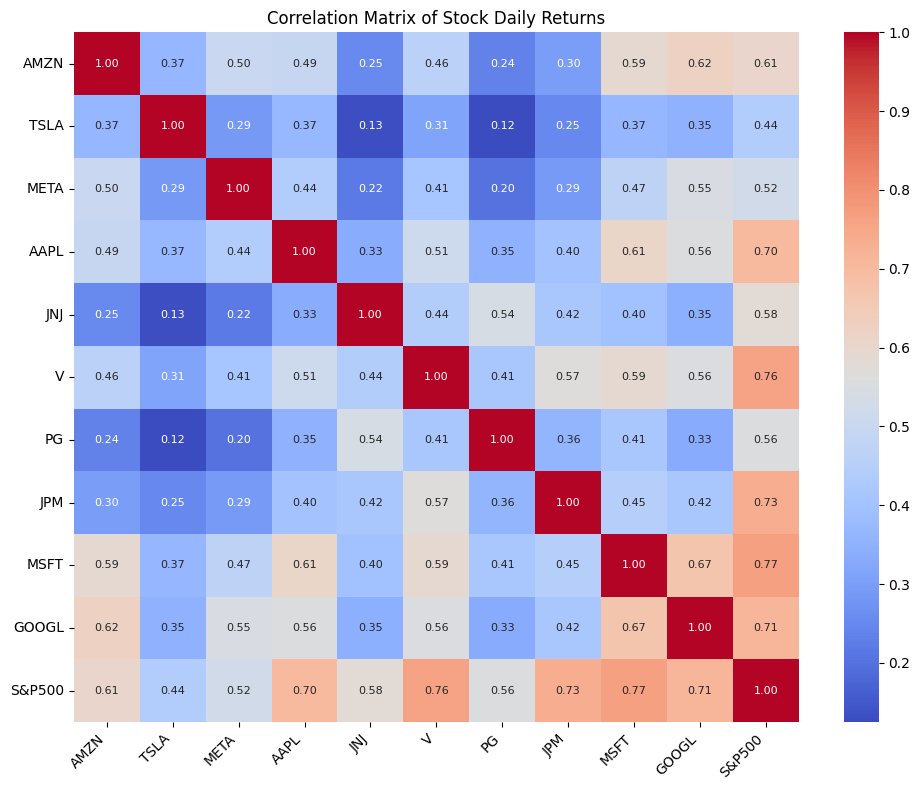

In [56]:
# Drop unnecessary columns and rows from the correlation matrix
correlation_matrix_cleaned = correlation_matrix.drop(['Date', 'Anomaly', 'Rolling Beta AAPL'], axis=0).drop(['Date', 'Anomaly', 'Rolling Beta AAPL'], axis=1)

# Increase the figure size for better readability
plt.figure(figsize=(10, 8))

# Plot the cleaned heatmap
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"size": 8})

# Rotate the x and y axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add title
plt.title("Correlation Matrix of Stock Daily Returns")

# Show the plot
plt.tight_layout()
plt.show()


In [44]:
# Function to trigger alerts for anomalies
def trigger_alerts(df):
    anomaly_stocks = df[df['Anomaly'] == -1].columns[1:-1]  # Exclude 'Date' and 'Anomaly'
    if not anomaly_stocks.empty:
        print(f"Anomalies detected in: {', '.join(anomaly_stocks)}")
        print("Consider adjusting your portfolio.")

# Trigger alerts based on detected anomalies
trigger_alerts(stocks_daily_return)


Anomalies detected in: AMZN, TSLA, META, AAPL, JNJ, V, PG, JPM, MSFT, GOOGL, S&P500, Anomaly
Consider adjusting your portfolio.


In [46]:
# Sharpe Ratio Calculation for each stock
for stock in keys:
    stock_std = stocks_daily_return[stock].std() * np.sqrt(252)  # Annualized standard deviation
    sharpe_ratio = (ER[stock] - rf) / stock_std
    print(f'Sharpe Ratio for {stock} is {sharpe_ratio}')


Sharpe Ratio for AMZN is 0.45905118948932566
Sharpe Ratio for TSLA is 0.3308741623995198
Sharpe Ratio for META is 0.39648145619567426
Sharpe Ratio for AAPL is 0.5324662700087296
Sharpe Ratio for JNJ is 0.4393475816688625
Sharpe Ratio for V is 0.5752972724231709
Sharpe Ratio for PG is 0.4214681818426083
Sharpe Ratio for JPM is 0.5560752440851262
Sharpe Ratio for MSFT is 0.5802547975342536
Sharpe Ratio for GOOGL is 0.5403984749844906


## Rolling Beta Calculation for AAPL

In [47]:
# Required libraries
import pandas as pd
import numpy as np

# Define a rolling window size (e.g., 30 days)
window_size = 30

# Function to calculate rolling beta
def calculate_rolling_beta(stock_returns, market_returns, window):
    # Calculate the rolling covariance and variance
    rolling_cov = stock_returns.rolling(window).cov(market_returns)
    rolling_var = market_returns.rolling(window).var()
    rolling_beta = rolling_cov / rolling_var
    return rolling_beta

# Calculate rolling beta for a specific stock, e.g., AAPL
rolling_beta_aapl = calculate_rolling_beta(stocks_daily_return['AAPL'], stocks_daily_return['S&P500'], window_size)

# Adding the rolling beta to the DataFrame for visualization
stocks_daily_return['Rolling Beta AAPL'] = rolling_beta_aapl

# Plotting Rolling Beta for AAPL
import plotly.express as px

fig = px.line(stocks_daily_return, x='Date', y='Rolling Beta AAPL', title='Rolling Beta for AAPL')
fig.show()


##ARIMA Model for Forecasting

In [37]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Ensure 'Date' column is in datetime format
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])

# Function to fit ARIMA model and forecast
def arima_forecast(stock_prices, order=(1, 1, 1), steps=10):
    model = ARIMA(stock_prices, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=steps)
    return forecast, model_fit

# Define the number of forecast steps
forecast_steps = 10  # Number of days to forecast

# List of stocks to forecast (excluding 'Date')
stocks = stocks_df.columns[1:]  # Assuming the first column is 'Date'

# Create a figure with subplots
num_stocks = len(stocks)
fig = make_subplots(rows=num_stocks, cols=1, subplot_titles=stocks)

# Loop through each stock and plot forecasts
for i, stock in enumerate(stocks):
    stock_prices = stocks_df[stock]

    # Fit ARIMA model and forecast future prices
    forecast, model_fit = arima_forecast(stock_prices, order=(1, 1, 1), steps=forecast_steps)

    # Create a date range for the forecast
    last_date = stocks_df['Date'].iloc[-1]
    forecast_dates = pd.date_range(start=last_date, periods=forecast_steps + 1, freq='B')[1:]

    # Add historical prices to the plot
    fig.add_trace(go.Scatter(x=stocks_df['Date'], y=stock_prices,
                             mode='lines',
                             name='Historical Prices'),
                  row=i + 1, col=1)

    # Add forecast to the plot
    fig.add_trace(go.Scatter(x=forecast_dates, y=forecast,
                             mode='lines',
                             name='Forecast',
                             line=dict(color='orange')),
                  row=i + 1, col=1)

# Update layout
fig.update_layout(title='Stock Price Forecast using ARIMA',
                  height=300 * num_stocks,  # Adjust height based on number of stocks
                  xaxis_title='Date',
                  yaxis_title='Price')

# Show the figure
fig.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

